<a href="https://colab.research.google.com/github/igiyazov/MyRepo/blob/main/mov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

# Настройка фич




In [ ]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [ ]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Troutt, Miss. Edwina Celia ""Winnie""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
titanic_train.groupby('Pclass').mean()[['Age']]

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [ ]:
titanic_train.loc[titanic_train.Age.isnull(), 'Age'] = titanic_train.groupby('Pclass')['Age'].transform('mean')
titanic_test.loc[titanic_test.Age.isnull(), 'Age'] = titanic_test.groupby('Pclass')['Age'].transform('mean')

In [ ]:
titanic_train.iloc[[5, 17]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.87763,0,0,244373,13.0000,NaN,S


In [ ]:
titanic_train = titanic_train.drop('Cabin', axis=1)
titanic_test = titanic_test.drop('Cabin', axis=1)

In [ ]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace = True)

In [ ]:
print(' Train Null Values')
print(titanic_train.isnull().sum())
print("-" * 30)
print('Test Null Values')
print(titanic_test.isnull().sum())

Training Data Null Values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
------------------------------
Test Data Null Values
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Анализ данных

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


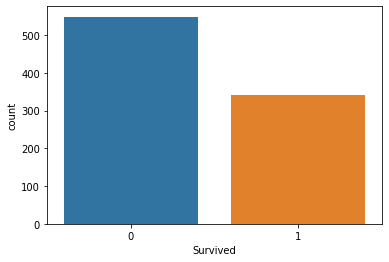

In [ ]:
sns.countplot(x='Survived', data=titanic_train)

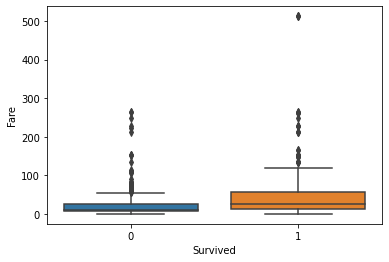

In [ ]:
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic_train)

In [ ]:
titanic_train.groupby('Survived').mean()[['Fare']]

,Fare
Survived,
0,22.117887
1,48.395408


In [ ]:
titanic_train.loc[titanic_train['Fare'] > 500, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


,Fare
Survived,
0,22.117887
1,44.289799


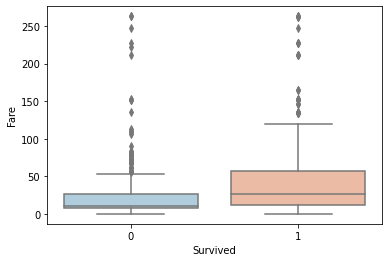

In [ ]:
titanic_no_500s = titanic_train.loc[titanic_train['Fare'] < 500, :]
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic_no_500s, palette = 'RdBu_r')
titanic_no_500s.groupby('Survived').mean()[['Fare']]

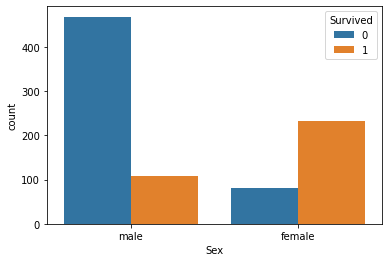

In [ ]:
sns.countplot(x = 'Sex', data = titanic_train, hue = 'Survived')

[(0.0, 100.0), Text(0.5, 1.0, "Distribution of Passenger Age's")]

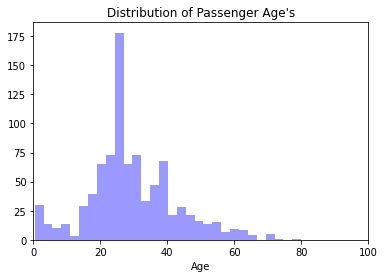

In [ ]:
hist = sns.distplot(titanic_train['Age'], color='b', bins=30, kde=False)
hist.set(xlim=(0, 100), title = "Distribution of Passenger Age's")

In [ ]:
titanic_train.Age.describe()

count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Boxplot of Age')]

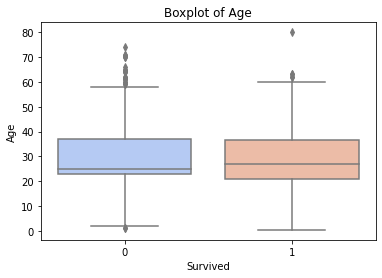

In [ ]:
age_box = sns.boxplot(y = 'Age', x = 'Survived',data = titanic_train, palette='coolwarm')
age_box.set(title='Boxplot of Age')

In [ ]:
titanic_train.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646,646,646


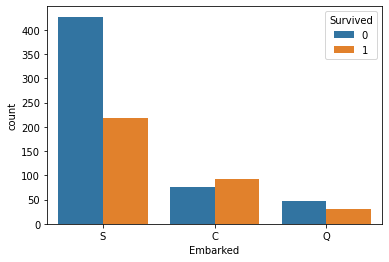

In [ ]:
sns.countplot(x = 'Embarked', hue = 'Survived', data=titanic_train)

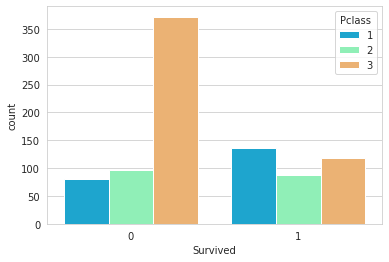

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=titanic_train, palette = 'rainbow')

In [ ]:

traindf = titanic_train.copy()
testdf = titanic_test.copy()

In [ ]:

all_data = [traindf, testdf]


In [ ]:

for dat in all_data:
    dat.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
traindf.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:

for dat in all_data:
    

    bins = (0, 8, 15, 31, 515)

    group_names = ['Fare_Group_1', 'Fare_Group_2', 'Fare_Group_3', 'Fare_Group_4']

    categories = pd.cut(dat.Fare, bins, labels=group_names)
    
    dat['Fare'] = categories


In [ ]:
traindf.describe()['Age']

count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
for dat in all_data:
    bins = (0, 15, 30, 45, 60, 75, 90)

    group_names = ['Child', 'Young Adult', 'Adult', 'Experienced', 'Senior', 'Elderly']

    categories = pd.cut(dat.Age, bins, labels=group_names)
    
    dat['Age'] = categories

In [ ]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,Young Adult,1,0,Fare_Group_1,S
1,2,1,1,female,Adult,1,0,Fare_Group_4,C
2,3,1,3,female,Young Adult,0,0,Fare_Group_1,S
3,4,1,1,female,Adult,1,0,Fare_Group_4,S
4,5,0,3,male,Adult,0,0,Fare_Group_2,S


In [ ]:
for dat in all_data:
    dat['Fam_Size'] = dat['SibSp'] + dat['Parch']

In [ ]:
traindf = pd.get_dummies(traindf)
traindf.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fam_Size,Sex_female,Sex_male,Age_Child,Age_Young Adult,Age_Adult,Age_Experienced,Age_Senior,Age_Elderly,Fare_Fare_Group_1,Fare_Fare_Group_2,Fare_Fare_Group_3,Fare_Fare_Group_4,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,2,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2,3,1,3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,4,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,5,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
testdf = pd.get_dummies(testdf)
testdf.head()

,PassengerId,Pclass,SibSp,Parch,Fam_Size,Sex_female,Sex_male,Age_Child,Age_Young Adult,Age_Adult,Age_Experienced,Age_Senior,Age_Elderly,Fare_Fare_Group_1,Fare_Fare_Group_2,Fare_Fare_Group_3,Fare_Fare_Group_4,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,893,3,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,894,2,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,895,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
4,896,3,1,1,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  

In [ ]:
X = traindf.drop(columns=['PassengerId', 'Survived'], axis=1)
y = traindf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
results = pd.DataFrame(columns=['Validation'], index=[ 'Support Vector Machine'])

# Метод опорных векторов

In [ ]:
def svm(X_train, X_test, y_train, y_test):
    

    c_vals = list(range(1, 100))
    

    accuracy = [0 for i in range(99)]
    

    for i, c in enumerate(c_vals):
        svc_model = SVC(C=c)
        
        svc_model.fit(X_train, y_train)
        
        predictions = svc_model.predict(X_test)
        
        accuracy[i] = accuracy_score(y_test, predictions)
    
    print("Best C Value:", c_vals[accuracy.index(max(accuracy))])
    print(accuracy)
    print("Prediction Accuracy: ", max(accuracy))
    
    return max(accuracy)
        
        

In [ ]:

svm_preds = svm(X_train, X_test, y_train, y_test)

results.loc['SVM', 'Validation'] = svm_preds
results.head()


Best C Value: 2
[0.8432835820895522, 0.8544776119402985, 0.8544776119402985, 0.8507462686567164, 0.8395522388059702, 0.8470149253731343, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8544776119402985, 0.8432835820895522, 0.8432835820895522, 0.835820895522388, 0.835820895522388, 0.835820895522388, 0.8470149253731343, 0.8470149253731343, 0.8470149253731343, 0.8470149253731343, 0.8470149253731343, 0.8470149253731343, 0.8432835820895522, 0.8395522388059702, 0.8395522388059702, 0.8432835820895522, 0.8432835820895522, 0.8470149253731343, 0.8470149253731343, 0.8470149253731343, 0.8470149253731343, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507462686567164, 0.8507

,Validation
Support Vector Machine,0.854478
SVM,0.854478
